Link: https://www.kaggle.com/datasets/steve1215rogg/e-commerce-dataset/data

# EDA

In [87]:
import pandas as pd

In [92]:
data = pd.read_csv('ecommerce_dataset_updated.csv')

In [93]:
data.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [46]:
data.shape

(3660, 8)

In [47]:
data.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


There's no missing value

In [53]:
data['Category'].value_counts()

Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: Category, dtype: int64

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

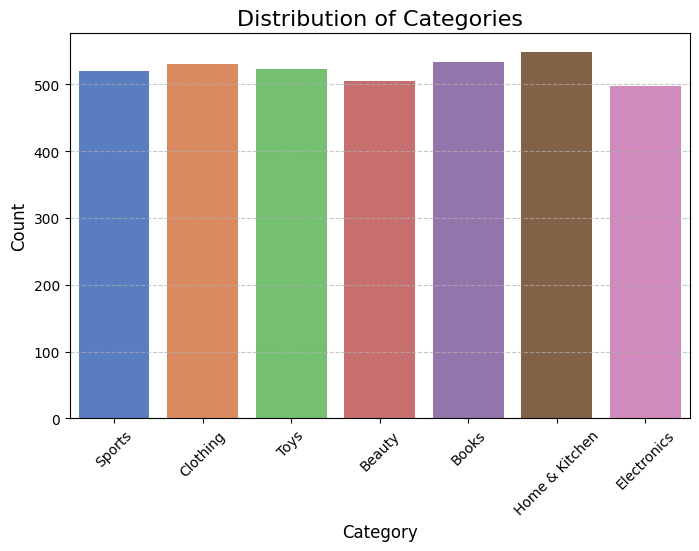

In [91]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=data, palette='muted')

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [54]:
data['Payment_Method'].value_counts()

Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: Payment_Method, dtype: int64

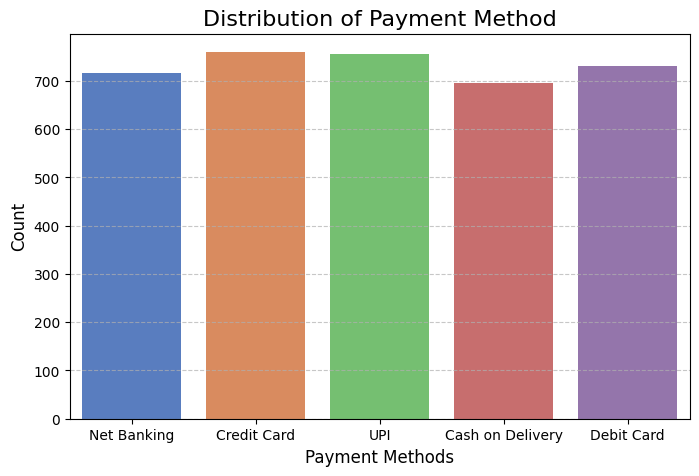

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment_Method', data=data, palette='muted')

plt.title('Distribution of Payment Method', fontsize=16)
plt.xlabel('Payment Methods', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

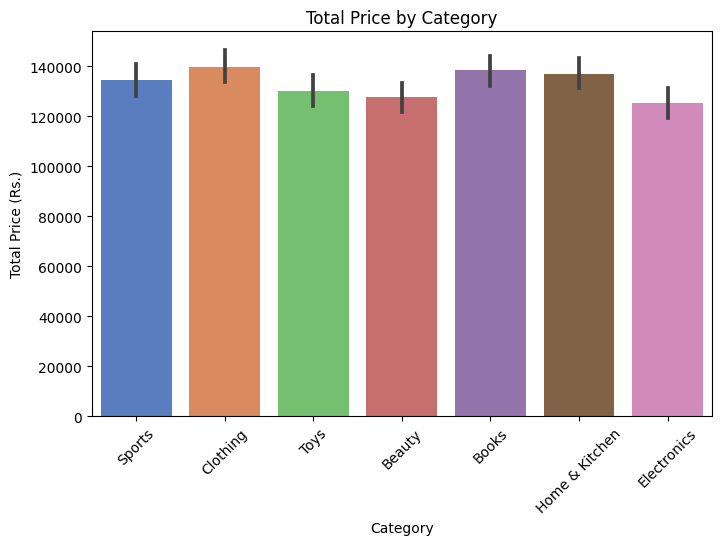

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Price (Rs.)', data=data, estimator=sum, palette='muted')

plt.title('Total Price by Category')
plt.ylabel('Total Price (Rs.)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

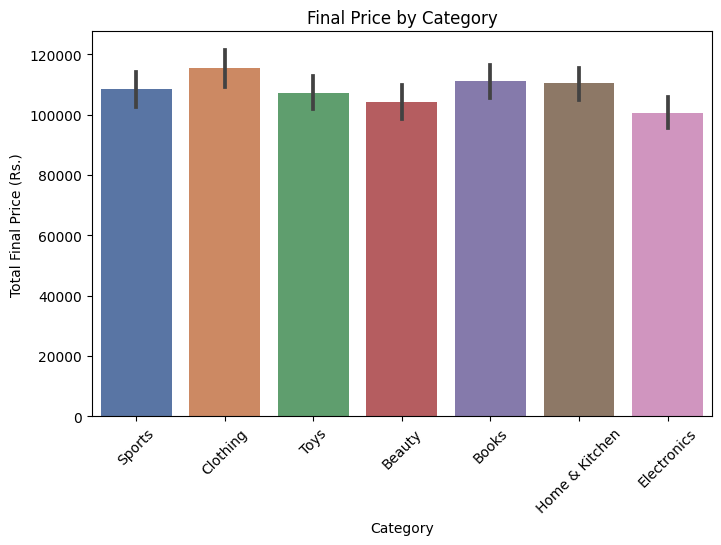

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Final_Price(Rs.)', data=data, estimator=sum, palette='deep')

plt.title('Total Final Price by Category')
plt.ylabel('Total Final Price (Rs.)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Data Preparation

In [66]:
data = data.drop(columns=['User_ID', 'Product_ID'])

In [67]:
data.head()

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,Toys,173.19,25,129.89,UPI,01-04-2024
4,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
#Encoding: Label encoding
encode = LabelEncoder()

In [70]:
#Encode column: 'Category'
data['Category'] = encode.fit_transform(data['Category'])

*   Beauty = 0
*   Books = 1
*   Clothing = 2
*   Electronics = 3
*   Home & Kitchen = 4
*   Sports = 5
*   Toys = 6



In [71]:
#Encode column: 'Payment_Method'
data['Payment_Method'] = encode.fit_transform(data['Payment_Method'])



*   Cash on Delivery = 0
*   Credit Card = 1
*   Debit Card = 2
*   Net Banking = 3
*   UPI = 4





In [72]:
#Date Format: dd-mm-yyyy (day/month/year)
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], format='%d-%m-%Y')

In [73]:
# Extract the month and year from 'Purchase_Date' column
data['Month'] = data['Purchase_Date'].dt.month
data['Year'] = data['Purchase_Date'].dt.year

In [74]:
data = data.drop(columns=['Purchase_Date'])

In [75]:
data.head()

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Month,Year
0,5,36.53,15,31.05,3,11,2024
1,2,232.79,20,186.23,3,2,2024
2,5,317.02,25,237.76,1,9,2024
3,6,173.19,25,129.89,4,4,2024
4,0,244.80,20,195.84,3,9,2024


# Data Modeling

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
#Separate features and target (the final price)
x = data.drop('Final_Price(Rs.)', axis=1)
y = data['Final_Price(Rs.)']

In [78]:
#Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [81]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
y_pred = model.predict(x_test)

# Evaluation

Evaluation metrics: MSE, MAE, and R-Squared score

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [85]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r_squared:.2f}")

Mean Squared Error (MSE): 0.99
Mean Absolute Error (MAE): 0.71
R-squared Score: 1.00


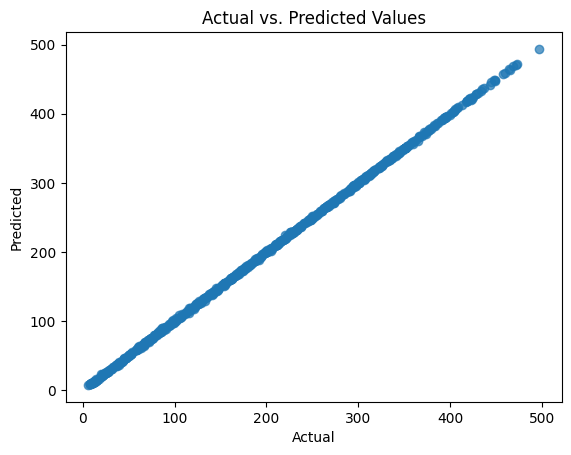

In [86]:
# Check how well the model's predictions match the actual values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()